In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
import pickle
# Load the dataset
df = pd.read_csv('/Users/raushankumar/Documents/Miles/data.csv')

# Convert the date to separate day, month, and year columns
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Drop the original date column
df.drop(columns=['date'], inplace=True)

# Drop the specified columns for regression
X_reg = df.drop(['price', 'status_encoded', 'customer'], axis=1)
y_reg = df['price']

# Split the data into training and testing sets for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Initialize the Random Forest Regressor
regressor = RandomForestRegressor(random_state=42)

# Train the model
regressor.fit(X_train_reg, y_train_reg)

# Make predictions and evaluate the regression model
y_pred_reg = regressor.predict(X_test_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Regression Model - Mean Absolute Error: {mae:.2f}")
print(f"Regression Model - Mean Squared Error: {mse:.2f}")
print(f"Regression Model - R-squared: {r2:.2f}")

# Drop the specified columns for classification
X_clf = df.drop(['price', 'status_encoded', 'customer'], axis=1)
y_clf = df['status_encoded']

# Split the data into training and testing sets for classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
classifier = RandomForestClassifier(random_state=42)

# Train the model
classifier.fit(X_train_clf, y_train_clf)

# Make predictions and evaluate the classification model
y_pred_clf = classifier.predict(X_test_clf)
accuracy = accuracy_score(y_test_clf, y_pred_clf)
conf_matrix = confusion_matrix(y_test_clf, y_pred_clf)
class_report = classification_report(y_test_clf, y_pred_clf)

print(f"Classification Model - Accuracy: {accuracy:.2f}")
print("Classification Model - Confusion Matrix:")
print(conf_matrix)
print("Classification Model - Classification Report:")
print(class_report)

# Save both models into a single .pkl file
models = {
    'regressor': regressor,
    'classifier': classifier
}


Regression Model - Mean Absolute Error: 46.71
Regression Model - Mean Squared Error: 4834.26
Regression Model - R-squared: 0.89
Classification Model - Accuracy: 0.93
Classification Model - Confusion Matrix:
[[ 7103  1858]
 [ 1062 29580]]
Classification Model - Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      8961
           1       0.94      0.97      0.95     30642

    accuracy                           0.93     39603
   macro avg       0.91      0.88      0.89     39603
weighted avg       0.92      0.93      0.93     39603



In [4]:
correlation_matrix = df.corr()


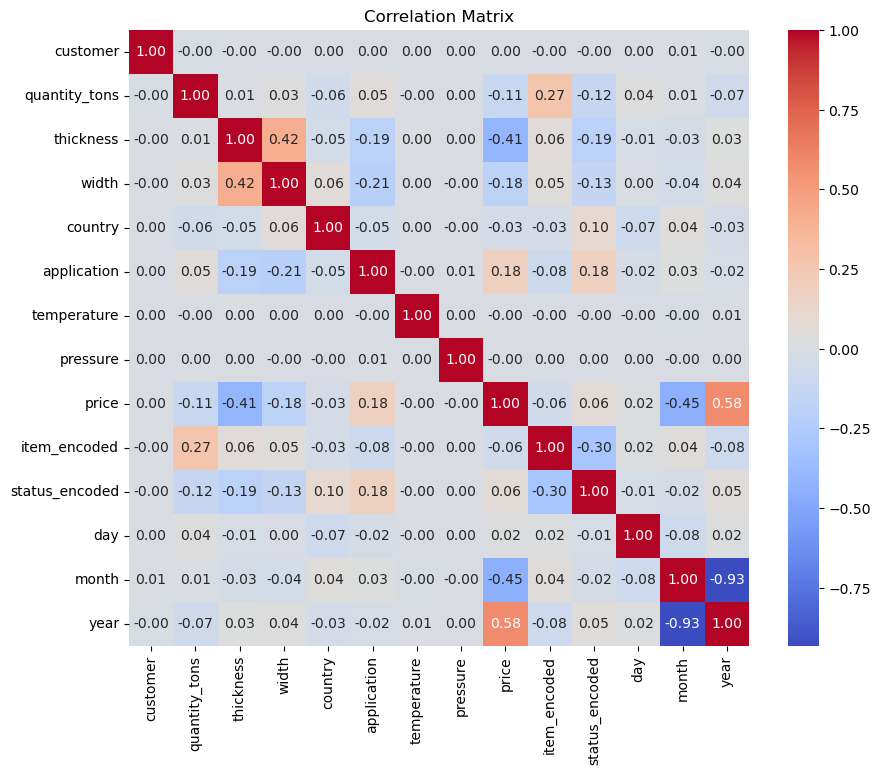

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()